In [39]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tqdm import tqdm
import numpy as np
%matplotlib inline

In [40]:
def create_model():
    model = Sequential()
    # 224,224,16
    model.add(Conv2D(filters = 16, kernel_size = 2, padding = 'same', activation = 'relu', input_shape = (224, 224, 3)))
    # 112,112,16
    model.add(MaxPooling2D(pool_size = 2))
    # Dropout
    model.add(Dropout(0.5))
    # 112,112,32
    model.add(Conv2D(filters = 32, kernel_size = 2, padding = 'same', activation = 'relu'))
    # 56,56,32
    model.add(MaxPooling2D(pool_size = 2))
    # Dropout
    model.add(Dropout(0.5))
    # 56,56,64
    model.add(Conv2D(filters = 64, kernel_size = 2, padding = 'same', activation = 'relu'))
    # 28,28,64
    model.add(MaxPooling2D(pool_size = 2))
    # Dropout
    model.add(Dropout(0.5))
    # 28,28,128
    model.add(Conv2D(filters = 128, kernel_size = 2, padding = 'same', activation = 'relu'))
    # 14,14,128
    model.add(MaxPooling2D(pool_size = 2))
    # Dropout
    model.add(Dropout(0.5))
    # 14,14,256
    model.add(Conv2D(filters = 256, kernel_size = 2, padding = 'same', activation = 'relu'))
    # 7,7,256
    model.add(MaxPooling2D(pool_size = 2))
    # Dropout
    model.add(Dropout(0.5))
    # flatten
    model.add(Flatten())
    model.add(Dense(5000, activation = 'relu'))
    # Dropout
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation = 'relu'))
    # Dropout
    model.add(Dropout(0.5))
    model.add(Dense(500, activation = 'relu'))
    # Dropout
    model.add(Dropout(0.5))
    # Fully connected Layer to the number of signal categories
    model.add(Dense(4, activation = 'softmax'))
    return model
    
def img_to_tensor(img):
    img = cv2.resize(img,(224,224))
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(img, axis=0)

def get_classification(image):
    """Determines the color of the traffic light in the image

    Args:
        image (cv::Mat): image containing the traffic light  

    Returns:
        int: ID of traffic light color (specified in styx_msgs/TrafficLight)

    """
    #TODO implement light color prediction
    signal = model.predict(img_to_tensor(image))
    print(signal)

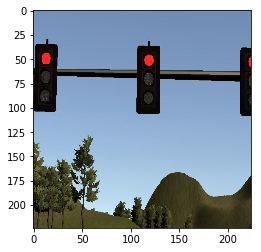

In [46]:
image = cv2.imread('TLdataset02_/red/out00044.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [47]:
model = create_model()
model.load_weights('saved_models/weights.best.self.defined.hdf5')

In [48]:
img_to_tensor(image)

array([[[[115, 143, 183],
         [115, 143, 183],
         [115, 143, 183],
         ..., 
         [111, 139, 179],
         [111, 139, 179],
         [111, 139, 179]],

        [[116, 144, 184],
         [116, 144, 184],
         [116, 144, 184],
         ..., 
         [112, 140, 180],
         [112, 140, 180],
         [112, 140, 180]],

        [[117, 145, 185],
         [117, 145, 185],
         [117, 145, 185],
         ..., 
         [113, 141, 181],
         [113, 141, 181],
         [113, 141, 181]],

        ..., 
        [[ 74,  73,  35],
         [ 81,  79,  41],
         [ 96,  91,  55],
         ..., 
         [ 49,  47,  24],
         [ 47,  44,  24],
         [ 44,  40,  21]],

        [[ 88,  88,  50],
         [ 79,  78,  40],
         [ 85,  81,  44],
         ..., 
         [ 45,  43,  21],
         [ 43,  41,  21],
         [ 33,  30,  12]],

        [[ 65,  67,  27],
         [ 70,  71,  31],
         [ 68,  66,  27],
         ..., 
         [ 39,  37,  16],
  

In [49]:
signal = model.predict(img_to_tensor(image))

In [50]:
signal

array([[ 0.,  1.,  0.,  0.]], dtype=float32)